# Support Vector Machine Demonstration

This notebook demonstrates a support vector machine model with a linear kernel for a binary classification problem.

## Import Required Libraries

Import the necessary libraries including numpy, matplotlib, and scikit-learn.

In [1]:
# Import the required libraries.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

## Helper Function

Define a helper function to draw margin lines for support vectors.

In [2]:
def draw_margin_lines(
        ax: plt.Axes, sv: np.ndarray, w: np.ndarray, intercept: float,
        color: str, linestyle: str, linewidth: float
    ):
    """
    Function to draw margin lines for support vectors.

    Args:
        ax (plt.Axes): Matplotlib axis object.
        sv (np.ndarray): Support vector.
        w (np.ndarray): Coefficients of the hyperplane.
        intercept (float): Intercept of the hyperplane.
        color (str): Color of the margin lines.
        linestyle (str): Line style of the margin lines.
        linewidth (float): Line width of the margin lines.
    """
    distance = (w[0] * sv[0] + w[1] * sv[1] + intercept) / np.linalg.norm(w)
    closest_point = sv - distance * w / np.linalg.norm(w)
    ax.annotate(
        "", xy=(closest_point[0], closest_point[1]), xytext=(sv[0], sv[1]),
        arrowprops={
            "arrowstyle": "<->",
            "color": color,
            "linestyle": linestyle,
            "linewidth": linewidth
        }
    )
    ax.plot(
        [], [], color=color, linestyle=linestyle,
        linewidth=linewidth, label="Margin"
    )

## Generate Sample Data

Generate random data for two classes using normal distributions.

In [3]:
# Set random seed for reproducibility.
np.random.seed(42)

# Generate data for two classes.
N_POINTS = 20
x_red = np.random.normal(loc=1, scale=0.75, size=(N_POINTS, 2))
x_blue = np.random.normal(loc=4, scale=0.75, size=(N_POINTS, 2))

## Prepare Data and Train SVM

Combine the data and train a Support Vector Machine with linear kernel.

In [4]:
# Combine the data.
X = np.vstack((x_red, x_blue))
y = np.hstack((np.zeros(N_POINTS), np.ones(N_POINTS)))

# Train the SVM model.
svm_model = SVC(kernel="linear")
svm_model.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Visualize SVM Results

Create a comprehensive visualization showing data points, decision boundary, margins, and support vectors.

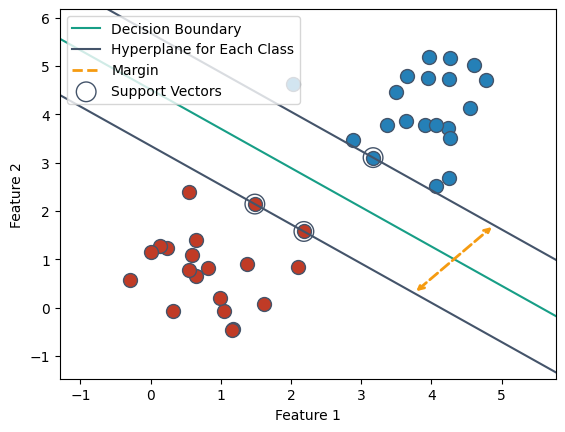

In [5]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot red class points
ax.scatter(
    x_red[:, 0], x_red[:, 1], color="#C03B26", s=100, edgecolor="#44546A")

# Plot blue class points
ax.scatter(
    x_blue[:, 0], x_blue[:, 1], color="#2580B7", s=100, edgecolor="#44546A")

# Get the separating hyperplane.
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = a * xx - (svm_model.intercept_[0]) / w[1]

# Plot the separating hyperplane.
ax.plot(xx, yy, color="#179E86", linestyle="-", label="Decision Boundary")

# Plot the margins.
margin = 1 / np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
ax.plot(xx, yy_down, color="#44546A", linestyle="-")
ax.plot(xx, yy_up, color="#44546A", linestyle="-",
        label="Hyperplane for Each Class")

# Draw margin lines.
point = [ xx[-15], yy_down[-15] ]
intercept_down = svm_model.intercept_[0] - margin * np.linalg.norm(w)
draw_margin_lines(
    ax, point, w, intercept_down, color="#F59B11",
    linestyle="--", linewidth=2
)

# Plot the support vectors.
ax.scatter(
    svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
    s=200, facecolors="none", edgecolors="#44546A", label="Support Vectors"
)

# Add legend to the plot.
ax.legend(loc="upper left")

# Customize plot appearance to match the style.
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(x_red[:, 0].min() - 1, x_blue[:, 0].max() + 1)
ax.set_ylim(x_red[:, 1].min() - 1, x_blue[:, 1].max() + 1)

# Show plot.
plt.show()